# Disclamer: Example here is NOT a neural model

This is a simple example showing how to use TensorGroup and DirectedTensorGroup classes.


In [1]:
import os
import sys
sys.path.insert(1, os.path.realpath(os.path.pardir))

import numpy as np

from bbtoolkit.structures.tensorgroups import DirectedTensorGroup, DirectedTensor, TensorGroup, NamedTensor

### Create TensorGroup

In [2]:
n_neurons = 10
n_synapses = 1000
n_timepoints = 10

w1 = np.random.rand(n_neurons, n_timepoints, n_synapses)
w2 = np.random.rand(n_synapses, n_timepoints)
w3 = np.random.rand(n_neurons, n_timepoints)
w4 = np.random.rand(n_neurons, n_timepoints)


neural_data = DirectedTensorGroup(
    DirectedTensor(
        'population_a',
        'population_b',
        w1.copy()
    ),
    DirectedTensor(
        'population_b',
        'population_a',
        w2.copy()
    ),
    DirectedTensor(
        'population_c',
        'population_a',
        w3.copy()
    ),
    DirectedTensor(
        'population_c',
        'population_b',
        w4.copy()
    )
)

### How does it look like?

In [3]:
neural_data

DirectedTensorGroup(population_a->population_b: (10, 10, 1000), population_b->population_a: (1000, 10), population_c->population_a: (10, 10), population_c->population_b: (10, 10))

### Other way to check that

In [4]:
neural_data.connection_map

,population_a,population_c,population_b
population_a,0,0,1
population_c,1,0,1
population_b,1,0,0


### Other way to check that

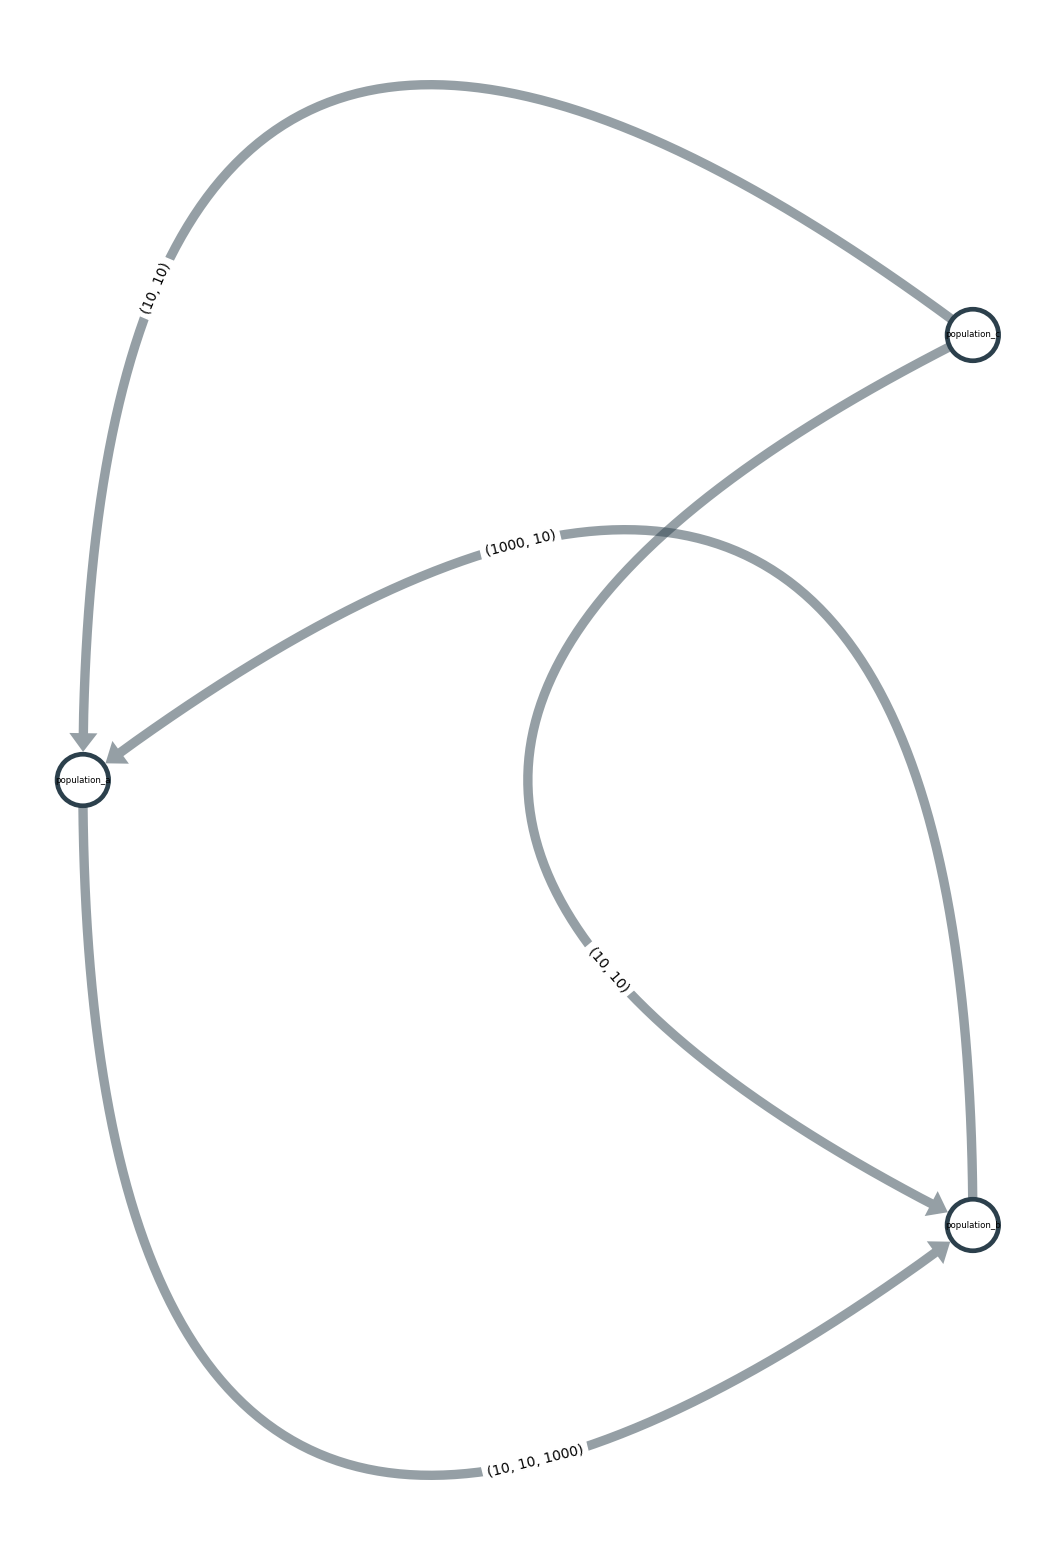

In [5]:
fig = neural_data.plot()

### What is inside?

In [6]:
neural_data.population_c.to.population_b

array([[0.95784524, 0.64765875, 0.93493884, 0.20219472, 0.35508096,
        0.25088683, 0.12391099, 0.12247996, 0.05038215, 0.21843464],
       [0.78830389, 0.99653954, 0.92092904, 0.00649014, 0.54411282,
        0.37041686, 0.80689315, 0.59680535, 0.7592997 , 0.39232312],
       [0.9226279 , 0.74393877, 0.43038752, 0.27488264, 0.41253088,
        0.42200017, 0.00540508, 0.24399175, 0.74478367, 0.78782593],
       [0.64496163, 0.53952412, 0.37759878, 0.94264696, 0.35853863,
        0.57836775, 0.46796642, 0.51954957, 0.55951301, 0.48383566],
       [0.85389716, 0.69888948, 0.9272344 , 0.45384937, 0.33018519,
        0.29093995, 0.72203421, 0.5524451 , 0.82985729, 0.1154394 ],
       [0.06691738, 0.1854671 , 0.40797977, 0.49957133, 0.48473264,
        0.89082716, 0.88171362, 0.06297744, 0.06076474, 0.02644246],
       [0.07451179, 0.99977355, 0.56184417, 0.35119525, 0.37958555,
        0.86446263, 0.99471318, 0.13117333, 0.08305062, 0.03337275],
       [0.76577721, 0.25285906, 0.8258181

### Let's subtract 0.5

In [7]:
neural_data.population_c -= .5

In [8]:
neural_data.population_c.to.population_a

array([[ 0.22646944, -0.49098582, -0.04743368, -0.05422166,  0.30155586,
         0.47617766,  0.22267623,  0.4044349 , -0.15707647,  0.06343248],
       [ 0.32087904,  0.08440023,  0.46621475,  0.15541786,  0.13935156,
         0.40779904,  0.37426339,  0.42692456, -0.22944063,  0.1464126 ],
       [ 0.04779825,  0.23705215, -0.311183  , -0.12043307,  0.46913801,
        -0.32237915,  0.208737  , -0.30724401, -0.11124318,  0.02996747],
       [-0.10571812, -0.32864722, -0.40377648, -0.10903217, -0.0609348 ,
         0.30080841, -0.0298882 ,  0.19337677,  0.11972084, -0.23899311],
       [-0.16757469,  0.23313735, -0.0501518 ,  0.47098348, -0.47946673,
        -0.13617549, -0.46950094, -0.34429579, -0.18944506,  0.21168765],
       [-0.11611841, -0.42223315, -0.30372505, -0.00495333, -0.0389026 ,
        -0.25521584,  0.16643102, -0.16947544, -0.0722164 ,  0.3556941 ],
       [-0.49288631, -0.17633904, -0.25716903, -0.10598855, -0.01351   ,
        -0.46909441,  0.48911747,  0.41406965

In [9]:
neural_data.population_c.to.population_b

array([[ 4.57845243e-01,  1.47658749e-01,  4.34938836e-01,
        -2.97805279e-01, -1.44919037e-01, -2.49113166e-01,
        -3.76089008e-01, -3.77520045e-01, -4.49617848e-01,
        -2.81565359e-01],
       [ 2.88303885e-01,  4.96539539e-01,  4.20929035e-01,
        -4.93509856e-01,  4.41128213e-02, -1.29583143e-01,
         3.06893149e-01,  9.68053462e-02,  2.59299696e-01,
        -1.07676882e-01],
       [ 4.22627904e-01,  2.43938765e-01, -6.96124830e-02,
        -2.25117357e-01, -8.74691190e-02, -7.79998263e-02,
        -4.94594921e-01, -2.56008253e-01,  2.44783674e-01,
         2.87825926e-01],
       [ 1.44961626e-01,  3.95241161e-02, -1.22401215e-01,
         4.42646963e-01, -1.41461375e-01,  7.83677539e-02,
        -3.20335831e-02,  1.95495682e-02,  5.95130115e-02,
        -1.61643428e-02],
       [ 3.53897155e-01,  1.98889479e-01,  4.27234398e-01,
        -4.61506337e-02, -1.69814807e-01, -2.09060045e-01,
         2.22034206e-01,  5.24451016e-02,  3.29857291e-01,
        -3.

In [10]:
neural_data.population_c.to.population_a.min(), neural_data.population_c.to.population_a.max()

(-0.49288631401538363, 0.49819511379353454)

### Let's add another tensor

In [11]:
from bbtoolkit.structures.tensorgroups import TensorGroup


neural_data.population_c += TensorGroup(
    population_a=1,
    population_b=0,
)

In [12]:
neural_data.population_c.to.population_b

array([[ 4.57845243e-01,  1.47658749e-01,  4.34938836e-01,
        -2.97805279e-01, -1.44919037e-01, -2.49113166e-01,
        -3.76089008e-01, -3.77520045e-01, -4.49617848e-01,
        -2.81565359e-01],
       [ 2.88303885e-01,  4.96539539e-01,  4.20929035e-01,
        -4.93509856e-01,  4.41128213e-02, -1.29583143e-01,
         3.06893149e-01,  9.68053462e-02,  2.59299696e-01,
        -1.07676882e-01],
       [ 4.22627904e-01,  2.43938765e-01, -6.96124830e-02,
        -2.25117357e-01, -8.74691190e-02, -7.79998263e-02,
        -4.94594921e-01, -2.56008253e-01,  2.44783674e-01,
         2.87825926e-01],
       [ 1.44961626e-01,  3.95241161e-02, -1.22401215e-01,
         4.42646963e-01, -1.41461375e-01,  7.83677539e-02,
        -3.20335831e-02,  1.95495682e-02,  5.95130115e-02,
        -1.61643428e-02],
       [ 3.53897155e-01,  1.98889479e-01,  4.27234398e-01,
        -4.61506337e-02, -1.69814807e-01, -2.09060045e-01,
         2.22034206e-01,  5.24451016e-02,  3.29857291e-01,
        -3.

In [13]:
neural_data.population_c.to.population_a.min(), neural_data.population_c.to.population_a.max()

(0.5071136859846164, 1.4981951137935345)

### Let's multiply it to another directed tensor group

In [14]:
neural_ratio = DirectedTensorGroup(
    DirectedTensor(
        'population_a',
        'population_b',
        10,
    ),
    DirectedTensor(
        'population_b',
        'population_a',
        100
    ),
    DirectedTensor(
        'population_c',
        'population_a',
        1000
    ),
    DirectedTensor(
        'population_c',
        'population_b',
        10000
    )
)

In [15]:
neural_data *= neural_ratio

In [16]:
neural_data.population_c.to.population_b

array([[ 4.57845243e+03,  1.47658749e+03,  4.34938836e+03,
        -2.97805279e+03, -1.44919037e+03, -2.49113166e+03,
        -3.76089008e+03, -3.77520045e+03, -4.49617848e+03,
        -2.81565359e+03],
       [ 2.88303885e+03,  4.96539539e+03,  4.20929035e+03,
        -4.93509856e+03,  4.41128213e+02, -1.29583143e+03,
         3.06893149e+03,  9.68053462e+02,  2.59299696e+03,
        -1.07676882e+03],
       [ 4.22627904e+03,  2.43938765e+03, -6.96124830e+02,
        -2.25117357e+03, -8.74691190e+02, -7.79998263e+02,
        -4.94594921e+03, -2.56008253e+03,  2.44783674e+03,
         2.87825926e+03],
       [ 1.44961626e+03,  3.95241161e+02, -1.22401215e+03,
         4.42646963e+03, -1.41461375e+03,  7.83677539e+02,
        -3.20335831e+02,  1.95495682e+02,  5.95130115e+02,
        -1.61643428e+02],
       [ 3.53897155e+03,  1.98889479e+03,  4.27234398e+03,
        -4.61506337e+02, -1.69814807e+03, -2.09060045e+03,
         2.22034206e+03,  5.24451016e+02,  3.29857291e+03,
        -3.

### Custom operations are also supporded!

In [17]:
new_neural_data = neural_ratio.operation_with(neural_data, operation=lambda x, y: x*np.sin(y))

In [18]:
new_neural_data.population_c.to.population_b

array([[-9135.5110529 ,   389.35576897,  9892.62903797,  1761.19642703,
         7932.70310902, -1507.37443455,  3928.02935012,  8381.72514806,
         5306.71957779, -7079.36661057],
       [-8094.44548263,  9941.51518422, -4293.78747402, -3367.7900384 ,
         9649.47020552, -9971.48474278,  3935.84857854,  4285.83469259,
        -9257.52370497, -7155.85537743],
       [-7425.85433635,  9982.57391791,  9658.5918423 , -9753.64503139,
        -9707.73298593, -7728.27592098, -8830.72857   , -3102.77504921,
        -5107.5209314 ,  5315.13248529],
       [-9739.50061049, -5642.40425165,  9352.56373322,   344.16960005,
        -7814.91514494, -9887.96780276,  1064.17384061,  6570.7881069 ,
        -9797.28895329,  9889.80308709],
       [ 9994.69537896, -2634.91624222, -2202.13045194, -3029.46668499,
        -9931.34919762,  9916.31987129,  6917.78110842,  1937.24192537,
         -992.12734836, -2922.45140855],
       [-9901.20153896,  5602.97696333, -2805.41948825,  9107.67918832,
   

### Let's change population C

In [19]:
neural_data.population_c = TensorGroup(
    population_d=np.eye(10),
    population_e=np.eye(100),
)

In [20]:
neural_data.connection_map

,population_a,population_c,population_b,population_e,population_d
population_a,0,0,1,0,0
population_c,0,0,0,1,1
population_b,1,0,0,0,0


### Actually tensor.population1.to.population2 is a syntax sugar

In [21]:
neural_data.population_c.population_d

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### And what about operations within the same tensor?

In [22]:
neural_data.population_b.to.population_a

array([[89.78107519, 38.89129108, 33.71119508, ..., 28.5944973 ,
        22.35108204, 50.33755517],
       [39.09966441, 42.99586568, 58.30390727, ..., 67.79019857,
        30.39094012, 99.1728826 ],
       [42.97364458, 11.26560516, 46.51308018, ..., 26.8240586 ,
        10.68151173, 40.91091985],
       ...,
       [67.64768451, 40.38727709, 95.19986615, ...,  2.22493411,
        17.74100422, 70.05413921],
       [56.6110194 , 98.52741484,  4.60739526, ..., 47.31399373,
        58.41031844, 77.32080641],
       [81.07184971,  7.71115175, 15.81545649, ...,  6.59357262,
        65.48388183, 32.8800517 ]])

In [23]:
neural_data.population_b.to.population_a@neural_data.population_c.population_d

array([[89.78107519, 38.89129108, 33.71119508, ..., 28.5944973 ,
        22.35108204, 50.33755517],
       [39.09966441, 42.99586568, 58.30390727, ..., 67.79019857,
        30.39094012, 99.1728826 ],
       [42.97364458, 11.26560516, 46.51308018, ..., 26.8240586 ,
        10.68151173, 40.91091985],
       ...,
       [67.64768451, 40.38727709, 95.19986615, ...,  2.22493411,
        17.74100422, 70.05413921],
       [56.6110194 , 98.52741484,  4.60739526, ..., 47.31399373,
        58.41031844, 77.32080641],
       [81.07184971,  7.71115175, 15.81545649, ...,  6.59357262,
        65.48388183, 32.8800517 ]])

In [24]:
np.all(neural_data.population_b.to.population_a == neural_data.population_b.to.population_a@neural_data.population_c.population_d)

True

### How to combine 2 groups together?

In [25]:
group1 = DirectedTensorGroup(
    DirectedTensor(
        'a', 'b', np.array([[1, 2], [3, 4]])
    ),
    DirectedTensor(
        'b', 'a', np.array([[5, 6], [7, 8]])
    )
)

group2 = DirectedTensorGroup(
    DirectedTensor(
        'b', 'c', np.array([[9, 10], [11, 12]])
    ),
    DirectedTensor(
        'c', 'a', np.array([[13, 14], [15, 16]])
    )
)

group = group1 + group2

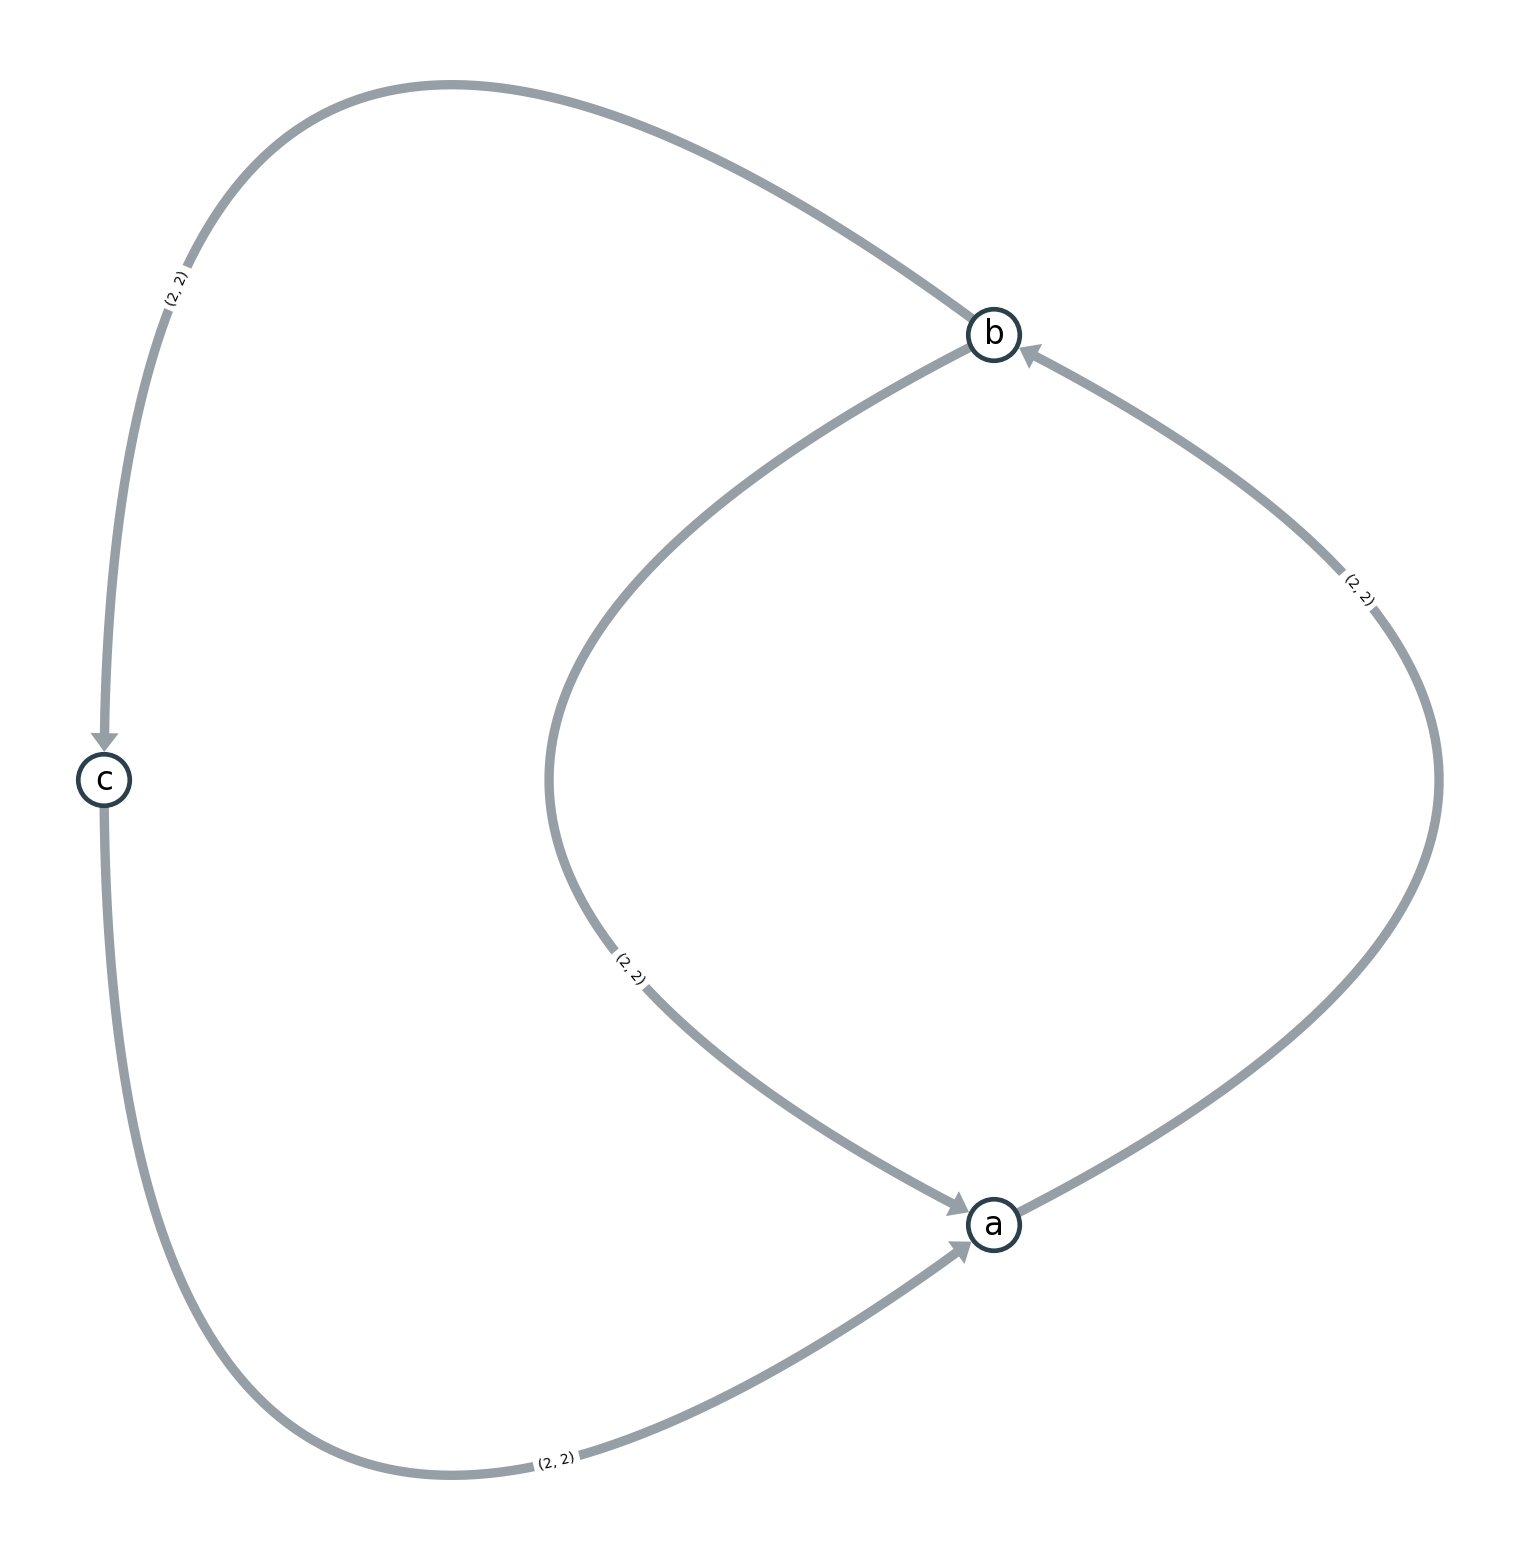

In [26]:
_ = group.plot()

### What if I still like dictionaries more?

In [27]:
neural_data = DirectedTensorGroup(
    {
        'population_a': {
            'population_b': w1.copy()
        },
        'population_b': {
            'population_a': w2.copy()
        },
        'population_c': {
            'population_a': w3.copy(),
            'population_b': w4.copy()
        }
    }
)

In [28]:
neural_data.connection_map

,population_a,population_c,population_b
population_a,0,0,1
population_c,1,0,1
population_b,1,0,0


In [29]:
neural_data['population_c']['population_b']

array([[0.95784524, 0.64765875, 0.93493884, 0.20219472, 0.35508096,
        0.25088683, 0.12391099, 0.12247996, 0.05038215, 0.21843464],
       [0.78830389, 0.99653954, 0.92092904, 0.00649014, 0.54411282,
        0.37041686, 0.80689315, 0.59680535, 0.7592997 , 0.39232312],
       [0.9226279 , 0.74393877, 0.43038752, 0.27488264, 0.41253088,
        0.42200017, 0.00540508, 0.24399175, 0.74478367, 0.78782593],
       [0.64496163, 0.53952412, 0.37759878, 0.94264696, 0.35853863,
        0.57836775, 0.46796642, 0.51954957, 0.55951301, 0.48383566],
       [0.85389716, 0.69888948, 0.9272344 , 0.45384937, 0.33018519,
        0.29093995, 0.72203421, 0.5524451 , 0.82985729, 0.1154394 ],
       [0.06691738, 0.1854671 , 0.40797977, 0.49957133, 0.48473264,
        0.89082716, 0.88171362, 0.06297744, 0.06076474, 0.02644246],
       [0.07451179, 0.99977355, 0.56184417, 0.35119525, 0.37958555,
        0.86446263, 0.99471318, 0.13117333, 0.08305062, 0.03337275],
       [0.76577721, 0.25285906, 0.8258181

In [30]:
for key in neural_data['population_c']:
    neural_data['population_c'][key] -= .5

In [31]:
neural_data['population_c']['population_b']

array([[ 4.57845243e-01,  1.47658749e-01,  4.34938836e-01,
        -2.97805279e-01, -1.44919037e-01, -2.49113166e-01,
        -3.76089008e-01, -3.77520045e-01, -4.49617848e-01,
        -2.81565359e-01],
       [ 2.88303885e-01,  4.96539539e-01,  4.20929035e-01,
        -4.93509856e-01,  4.41128213e-02, -1.29583143e-01,
         3.06893149e-01,  9.68053462e-02,  2.59299696e-01,
        -1.07676882e-01],
       [ 4.22627904e-01,  2.43938765e-01, -6.96124830e-02,
        -2.25117357e-01, -8.74691190e-02, -7.79998263e-02,
        -4.94594921e-01, -2.56008253e-01,  2.44783674e-01,
         2.87825926e-01],
       [ 1.44961626e-01,  3.95241161e-02, -1.22401215e-01,
         4.42646963e-01, -1.41461375e-01,  7.83677539e-02,
        -3.20335831e-02,  1.95495682e-02,  5.95130115e-02,
        -1.61643428e-02],
       [ 3.53897155e-01,  1.98889479e-01,  4.27234398e-01,
        -4.61506337e-02, -1.69814807e-01, -2.09060045e-01,
         2.22034206e-01,  5.24451016e-02,  3.29857291e-01,
        -3.

In [32]:
neural_data['population_c']['population_a'].min(), neural_data['population_c']['population_a'].max()

(-0.49288631401538363, 0.49819511379353454)

In [33]:
add = {
    'population_a': 1,
    'population_b': 0
}

for key in neural_data['population_c']:
    neural_data['population_c'][key] += add[key]

In [34]:
neural_data['population_c']['population_b']

array([[ 4.57845243e-01,  1.47658749e-01,  4.34938836e-01,
        -2.97805279e-01, -1.44919037e-01, -2.49113166e-01,
        -3.76089008e-01, -3.77520045e-01, -4.49617848e-01,
        -2.81565359e-01],
       [ 2.88303885e-01,  4.96539539e-01,  4.20929035e-01,
        -4.93509856e-01,  4.41128213e-02, -1.29583143e-01,
         3.06893149e-01,  9.68053462e-02,  2.59299696e-01,
        -1.07676882e-01],
       [ 4.22627904e-01,  2.43938765e-01, -6.96124830e-02,
        -2.25117357e-01, -8.74691190e-02, -7.79998263e-02,
        -4.94594921e-01, -2.56008253e-01,  2.44783674e-01,
         2.87825926e-01],
       [ 1.44961626e-01,  3.95241161e-02, -1.22401215e-01,
         4.42646963e-01, -1.41461375e-01,  7.83677539e-02,
        -3.20335831e-02,  1.95495682e-02,  5.95130115e-02,
        -1.61643428e-02],
       [ 3.53897155e-01,  1.98889479e-01,  4.27234398e-01,
        -4.61506337e-02, -1.69814807e-01, -2.09060045e-01,
         2.22034206e-01,  5.24451016e-02,  3.29857291e-01,
        -3.

In [35]:
neural_data['population_c']['population_a'].min(), neural_data['population_c']['population_a'].max()

(0.5071136859846164, 1.4981951137935345)

In [36]:
neural_ratio = {
    'population_a': {
        'population_b': 10
    },
    'population_b': {
        'population_a': 100
    },
    'population_c': {
        'population_a': 1000,
        'population_b': 10000
    }
}

In [37]:
neural_data['population_a']

TensorConnection(from population_a| population_b: ((10, 10, 1000)))

In [38]:
for key1 in neural_data:
    for key2 in neural_data[key1]:
        neural_data[key1][key2] *= neural_ratio[key1][key2]

In [39]:
neural_data['population_c']['population_b']

array([[ 4.57845243e+03,  1.47658749e+03,  4.34938836e+03,
        -2.97805279e+03, -1.44919037e+03, -2.49113166e+03,
        -3.76089008e+03, -3.77520045e+03, -4.49617848e+03,
        -2.81565359e+03],
       [ 2.88303885e+03,  4.96539539e+03,  4.20929035e+03,
        -4.93509856e+03,  4.41128213e+02, -1.29583143e+03,
         3.06893149e+03,  9.68053462e+02,  2.59299696e+03,
        -1.07676882e+03],
       [ 4.22627904e+03,  2.43938765e+03, -6.96124830e+02,
        -2.25117357e+03, -8.74691190e+02, -7.79998263e+02,
        -4.94594921e+03, -2.56008253e+03,  2.44783674e+03,
         2.87825926e+03],
       [ 1.44961626e+03,  3.95241161e+02, -1.22401215e+03,
         4.42646963e+03, -1.41461375e+03,  7.83677539e+02,
        -3.20335831e+02,  1.95495682e+02,  5.95130115e+02,
        -1.61643428e+02],
       [ 3.53897155e+03,  1.98889479e+03,  4.27234398e+03,
        -4.61506337e+02, -1.69814807e+03, -2.09060045e+03,
         2.22034206e+03,  5.24451016e+02,  3.29857291e+03,
        -3.

In [40]:
for key1 in neural_data:
    for key2 in neural_data[key1]:
        neural_data[key1][key2] = neural_ratio[key1][key2]*np.sin(neural_data[key1][key2])

In [41]:
new_neural_data['population_c']['population_b']

array([[-9135.5110529 ,   389.35576897,  9892.62903797,  1761.19642703,
         7932.70310902, -1507.37443455,  3928.02935012,  8381.72514806,
         5306.71957779, -7079.36661057],
       [-8094.44548263,  9941.51518422, -4293.78747402, -3367.7900384 ,
         9649.47020552, -9971.48474278,  3935.84857854,  4285.83469259,
        -9257.52370497, -7155.85537743],
       [-7425.85433635,  9982.57391791,  9658.5918423 , -9753.64503139,
        -9707.73298593, -7728.27592098, -8830.72857   , -3102.77504921,
        -5107.5209314 ,  5315.13248529],
       [-9739.50061049, -5642.40425165,  9352.56373322,   344.16960005,
        -7814.91514494, -9887.96780276,  1064.17384061,  6570.7881069 ,
        -9797.28895329,  9889.80308709],
       [ 9994.69537896, -2634.91624222, -2202.13045194, -3029.46668499,
        -9931.34919762,  9916.31987129,  6917.78110842,  1937.24192537,
         -992.12734836, -2922.45140855],
       [-9901.20153896,  5602.97696333, -2805.41948825,  9107.67918832,
   

In [42]:
neural_data['population_c'] = {
    'population_d': np.eye(10),
    'population_e': np.eye(100),
}

In [43]:
neural_data.connection_map

,population_a,population_c,population_b,population_e,population_d
population_a,0,0,1,0,0
population_c,0,0,0,1,1
population_b,1,0,0,0,0


In [44]:
neural_data['population_c']['population_d']

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [45]:
neural_data['population_b']['population_a']

array([[ 96.99710521,  92.91766956,  74.8849307 , ..., -31.47216783,
        -35.22119616,   7.20103311],
       [ 98.55434976, -83.40626436,  98.3038523 , ..., -96.99048716,
        -85.47071357, -97.74615514],
       [-84.61144336, -96.37626617,  57.35308811, ...,  99.27461252,
        -95.1086397 ,  -7.01576679],
       ...,
       [-99.46545976,  43.80491681,  81.46274397, ...,  79.35728595,
        -89.50537455,  80.70274545],
       [  6.23112463, -90.78143495, -99.44932206, ..., -18.89609506,
         95.79992227,  93.87586636],
       [-57.25061679,  98.98171408, -10.7286328 , ...,  30.54274632,
         47.02410518,  99.43160238]])

In [46]:
neural_data['population_b']['population_a']@neural_data['population_c']['population_d']

array([[ 96.99710521,  92.91766956,  74.8849307 , ..., -31.47216783,
        -35.22119616,   7.20103311],
       [ 98.55434976, -83.40626436,  98.3038523 , ..., -96.99048716,
        -85.47071357, -97.74615514],
       [-84.61144336, -96.37626617,  57.35308811, ...,  99.27461252,
        -95.1086397 ,  -7.01576679],
       ...,
       [-99.46545976,  43.80491681,  81.46274397, ...,  79.35728595,
        -89.50537455,  80.70274545],
       [  6.23112463, -90.78143495, -99.44932206, ..., -18.89609506,
         95.79992227,  93.87586636],
       [-57.25061679,  98.98171408, -10.7286328 , ...,  30.54274632,
         47.02410518,  99.43160238]])

In [47]:
np.all(neural_data['population_b']['population_a'] == neural_data['population_b']['population_a']@neural_data['population_c']['population_d'])

True

In [54]:
group1 = DirectedTensorGroup(
    {
        'a': {
            'b': np.array([[1, 2], [3, 4]])
        },
        'b': {
            'a': np.array([[5, 6], [7, 8]])
        }
    }
)

group2 = DirectedTensorGroup(
    {
        'b': {
            'c': np.array([[9, 10], [11, 12]])
        },
        'c': {
            'a': np.array([[13, 14], [15, 16]])
        }
    }
)

group = group1.copy()
group.update(group2)

# or
# group.update(
#     {
#         'b': {
#             'c': np.array([[9, 10], [11, 12]])
#         },
#         'c': {
#             'a': np.array([[13, 14], [15, 16]])
#         }
#     }
# )

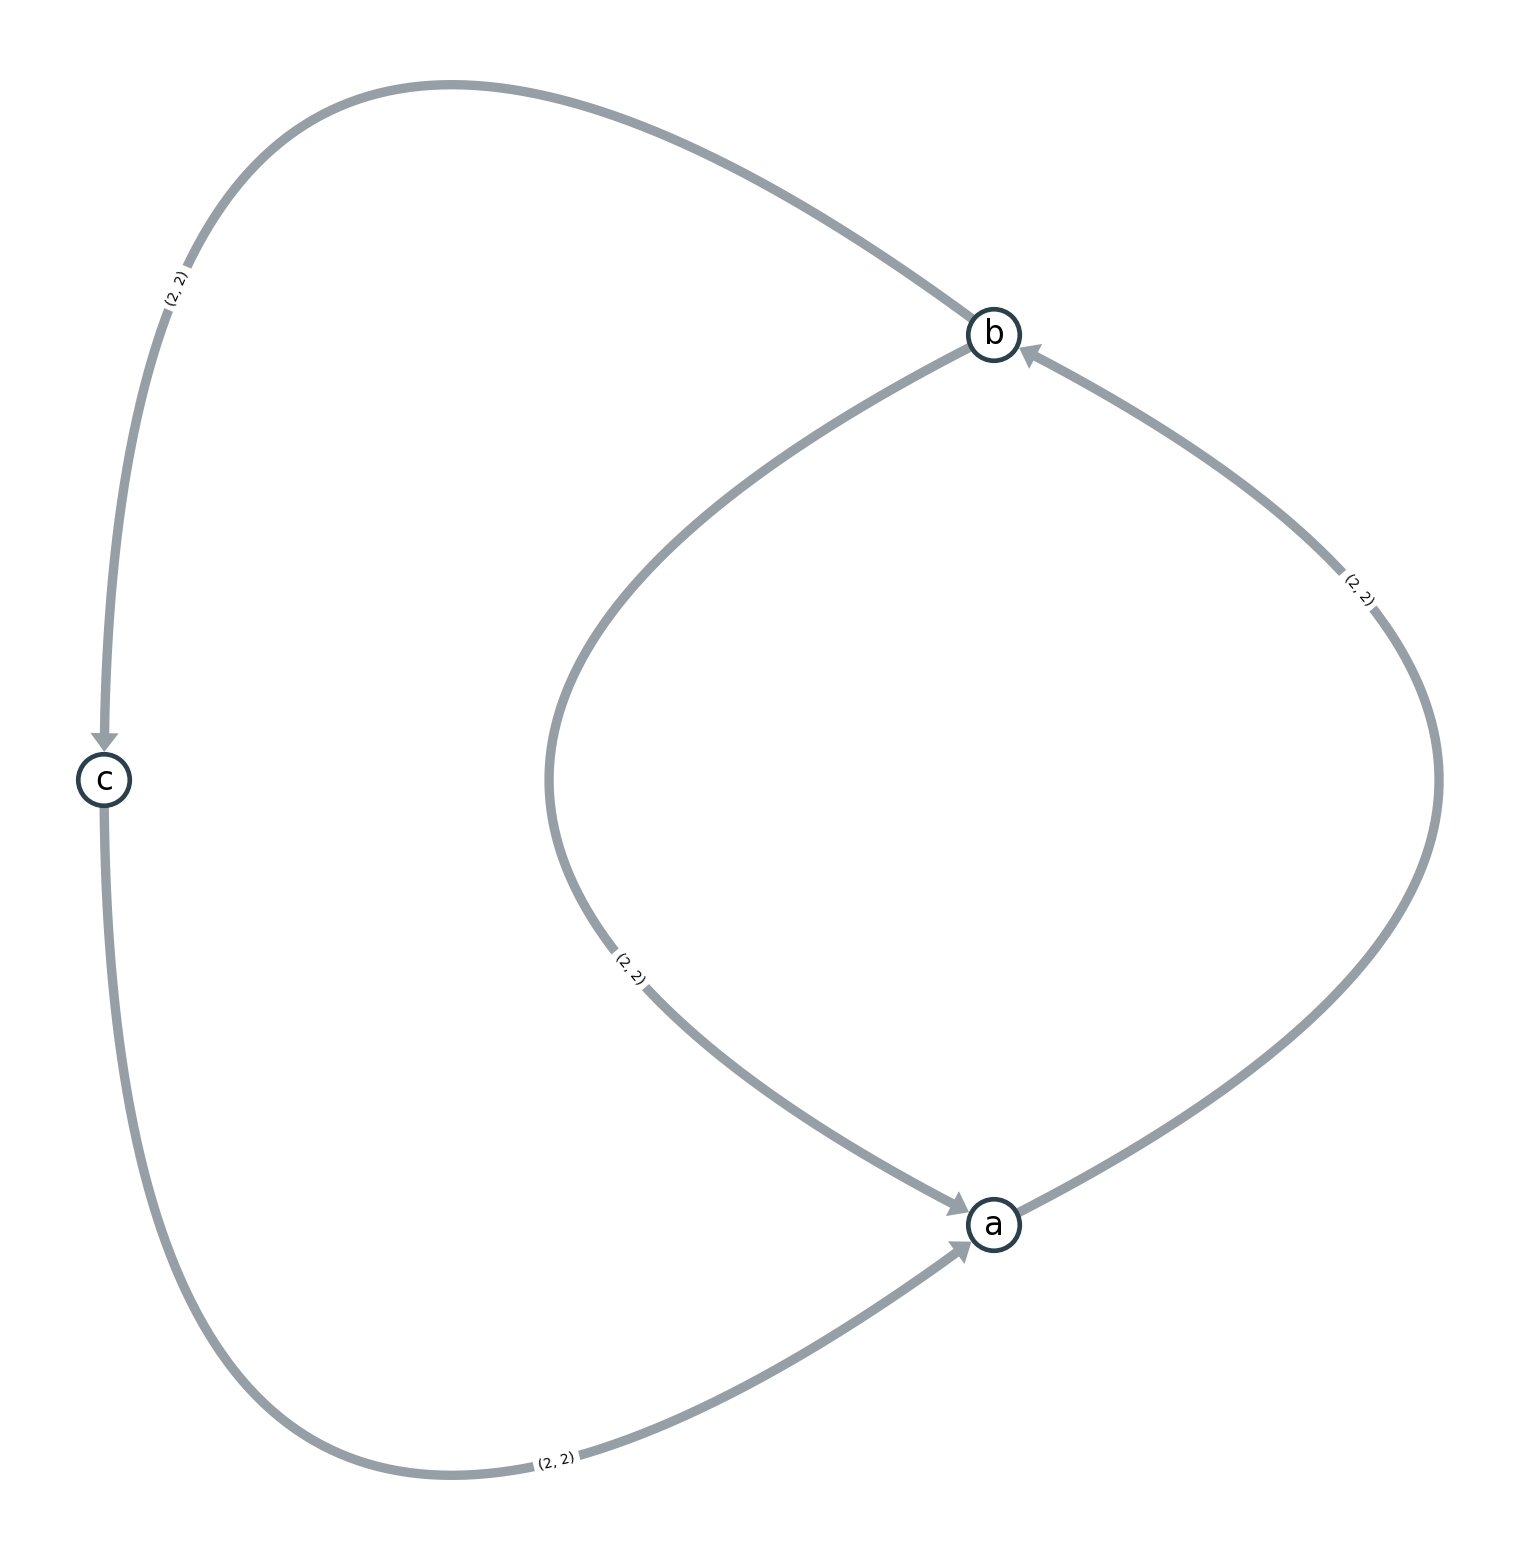

In [55]:
_ = group.plot()

### Everything works! Let's save that

In [64]:
neural_data.save('../neural_data.pkl')

### And read

In [65]:
loaded_neural_data = DirectedTensorGroup.load('../neural_data.pkl')

In [66]:
np.all(
    neural_data.population_a.to.population_b == loaded_neural_data.population_a.to.population_b
)

True